# Линейная классификация



*Анна Полянская*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,7)

In [2]:
from sklearn.linear_model import LogisticRegression
RANDOM_STATE = 246

## Регуляризация


  * Зачем нужна регуляризация
  * Какие виды регуляризации вы знаете?

1. Нарисуйте scatter plot данного синтетического датасета


In [3]:
#generate two linear separated samples
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

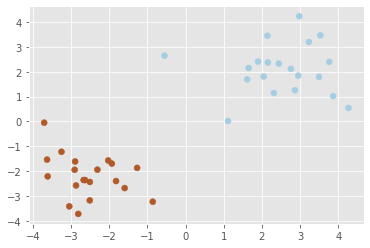

In [4]:
plt.scatter(X.T[0], X.T[1], c=y, cmap='Paired')
plt.show()

2. Примените к нему логистическую регрессию. Выведите получившиеся веса.

In [5]:
lreg = LogisticRegression(random_state=RANDOM_STATE)
lreg.fit(X, y)
coef = lreg.coef_[0]
intercept = lreg.intercept_

In [6]:
print('w_0 = %f' % intercept)
print('w_1, w_2 = ', coef)

w_0 = -0.486373
w_1, w_2 =  [-1.07898863 -1.00449204]


Добавьте к scatter plot'у разделяющую прямую.

In [7]:
def line(x, coef, intercept):
    return (-(x * coef[0]) - intercept) / coef[1]

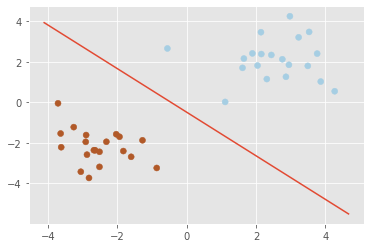

In [8]:
plt.scatter(X.T[0], X.T[1], c=y, cmap='Paired')
xmin, xmax = plt.xlim()
plt.plot([xmin, xmax], [line(xmin, coef, intercept), line(xmax, coef, intercept)])
plt.show(plt.xlim())

## Нелинейное разделяющее правило

In [9]:
from sklearn.datasets import make_circles 

In [10]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1, random_state=RANDOM_STATE+1)
y[y == 0] = -1

Обучите логистическую регрессию и нарисуйте scatter plot и разделяющую прямую. Выведите accuracy.

Можно ли построить логистическую регрессию с бОльшим качеством только лишь на исходных признаках?

In [12]:
lreg =  LogisticRegression(random_state=RANDOM_STATE+1)
lreg.fit(X, y)
lreg.score(X, y)

0.52

In [13]:
coef = lreg.coef_[0]
intercept = lreg.intercept_
print('w_0 = %f' % intercept)
print('w_1, w_2 = ', coef)

w_0 = -0.000612
w_1, w_2 =  [0.01022434 0.06835574]


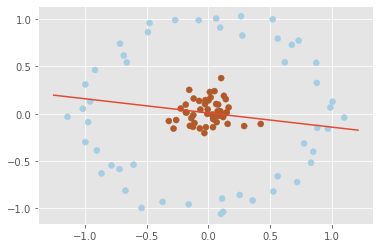

In [14]:
plt.scatter(X.T[0], X.T[1], c=y, cmap='Paired')
xmin, xmax = plt.xlim()
plt.plot([xmin, xmax], [line(xmin, coef, intercept), line(xmax, coef, intercept)])
plt.show(plt.xlim())

Придумайте и добавьте в датасет новый признак, позволяющий достичь лучшего качества. Визуализируйте результат.

Подсказка: вспомните, как выглядит уравнение окружности.

>                                > подсказка
>                                > вспомните как выглядит уравнение окружности

![](https://pbs.twimg.com/media/EDmmM8eXoAE-dB3.jpg)

$x^2 + y^2 = R^2$ - окружность с центром в начале координат (0,0)

$(x - x_0)^2 + (y - y_0)^2 = R^2$ - окружность с центром в точке $(x_0, y_0)$

$a \cdot (x - x_0)^2 + b \cdot (y - y_0)^2 = R^2$ - эллипс с центром в точке $(x_0, y_0)$

In [16]:
X1 = np.array([[x**2 for x in X.T[0]],
               [y**2 for y in X.T[1]]])

In [17]:
lreg.fit(X1.T, y)
print(lreg.score(X1.T, y))
coef = lreg.coef_[0]
intercept = lreg.intercept_
print('w_0 = %f' % intercept)
print('w_1, w_2 = ', coef)

1.0
w_0 = 1.766876
w_1, w_2 =  [-3.5872029  -3.54490596]


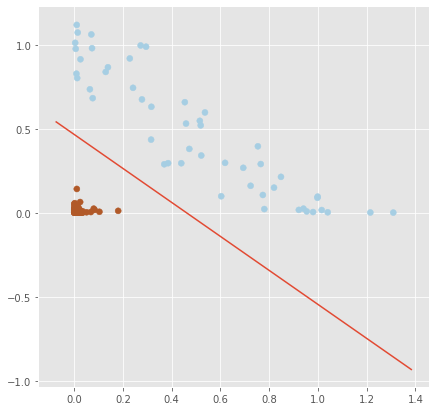

In [48]:
plt.scatter(X1[0], X1[1], c=y, cmap='Paired')
xmin, xmax = plt.xlim()
plt.plot([xmin, xmax], [line(xmin, coef, intercept), line(xmax, coef, intercept)])
plt.show(plt.xlim())

In [18]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1, random_state=RANDOM_STATE+1)
y[y == 0] = -1

In [19]:
X_new = np.c_[X[:, 0], X[:, 1], X[:, 0] ** 2 + X[:, 1] ** 2]

In [21]:
reg = LogisticRegression(fit_intercept=True)
reg.fit(X_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_predicted = reg.predict(X_new)
'accuracy = {}'.format((y == y_predicted).mean())

'accuracy = 1.0'

$A = \{a, b \}$

$B = \{d, e\}$

$A \times B = \{ (a,d), (a,e), (b, d), (b, e) \}$ -  декартово произведение двух множеств (результат - множество, состоящее из пар элементов)

In [31]:
x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1), np.arange(-1.5, 1.5, 0.1))


In [32]:
x0_, x1_ = x0.ravel(), x1.ravel()

In [35]:
x_grid = np.c_[x0_, x1_, x0_**2 + x1_**2]

In [42]:
y_decision = reg.decision_function(x_grid).reshape(x0.shape)

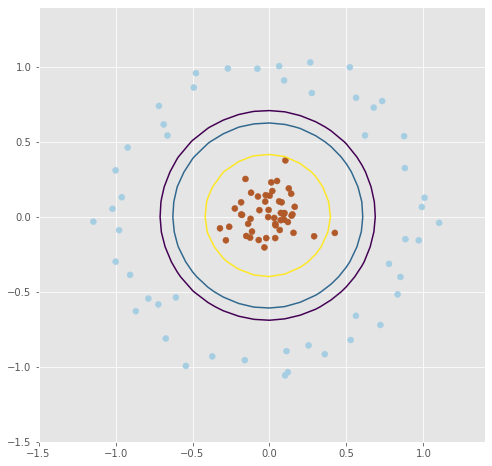

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

ax.contour(x0, x1, y_decision, levels=[0, 0.5, 1.5])

Замечание: вместо признака  $x_0^2 + y_0^2$ можно было бы взять, например, $|x_0| + |y_0|$ - тогда разделяющая кривая была бы квадратом (https://foxford.ru/wiki/matematika/figury-na-koordinatnoy-ploskosti-zadannye-neravenstvami)

## L1-регуляризация

Она позволяет осуществлять отбор признаков. Посмотрим, какие признаки могут не участвовать в модели

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
X_new = np.c_[X[:,0], X[:,1], X[:, 0] ** 2 + X[:, 1] ** 2]

Обучите логистическую регрессию с L1 (в sklearn.linear_model.LogisticRegression есть параметр penalty='l1'). Посмотрите на коэффициенты. Почему коэффициенты у бесполезных признаков получились очень маленькими?

In [52]:
lreg = LogisticRegression(random_state=RANDOM_STATE-1, penalty='l1', solver='liblinear')
lreg.fit(X_new, y)
print(lreg.score(X_new, y))
coef = lreg.coef_[0]
intercept = lreg.intercept_
print('w_0 = %f' % intercept)
print('w_1, w_2, w_3 = ', coef)

1.0
w_0 = 3.327803
w_1, w_2, w_3 =  [ 0.          0.         -7.67811472]


## Тональность текстов

1. Загрузите файл https://clck.ru/N6ta3 в DataFrame (вам поможет pd.read_csv)
2. Обучите логистическую регрессию. Выделите полезные признаки из текста (вам может помочь https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
3. Выведите самые полезные признаки. Почему они такие?

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
df = pd.read_csv('https://clck.ru/N6ta3', sep='\t', names=['text', 'class'])

df.head()

,text,class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [57]:
vectorizer = CountVectorizer(stop_words='english',
                            max_df=0.95,
                            min_df=4,
                            ngram_range=(1,1),
                            analyzer='word',
                            
                            )

In [59]:
df.text.values[:10]

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.',
       'I have to jiggle the plug to get it to line up right to get decent volume.',
       'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
       'If you are Razr owner...you must have this!',
       'Needless to say, I wasted my money.',
       'What a waste of money and time!.'], dtype=object)

In [63]:
vec = vectorizer.fit_transform(list(df['text']))
vec = vectorizer.fit_transform(df.text.values)

In [87]:
type(vec) # https://en.wikipedia.org/wiki/Sparse_matrix 

scipy.sparse.csr.csr_matrix

In [90]:
vec # https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

<1000x272 sparse matrix of type '<class 'numpy.int64'>'
	with 2888 stored elements in Compressed Sparse Row format>

In [88]:
features = vectorizer.get_feature_names()
print(features)

['10', 'able', 'absolutely', 'actually', 'ago', 'amazon', 'arrived', 'audio', 'away', 'awesome', 'awful', 'bad', 'bargain', 'bars', 'battery', 'belt', 'best', 'better', 'big', 'black', 'blue', 'bluetooth', 'bought', 'broke', 'buttons', 'buy', 'buying', 'cable', 'calls', 'came', 'camera', 'car', 'case', 'cases', 'cell', 'charge', 'charger', 'charging', 'charm', 'cheap', 'cingular', 'clarity', 'clear', 'clip', 'color', 'comes', 'comfortable', 'comfortably', 'company', 'completely', 'connection', 'cool', 'couldn', 'couple', 'crap', 'customer', 'data', 'day', 'days', 'deal', 'decent', 'definitely', 'design', 'device', 'did', 'didn', 'different', 'difficult', 'disappointed', 'disappointing', 'disappointment', 'does', 'doesn', 'don', 'dropped', 'ear', 'earpiece', 'ears', 'easier', 'easily', 'easy', 'end', 'especially', 'excellent', 'expect', 'expected', 'extra', 'face', 'family', 'far', 'fast', 'feature', 'feels', 'fine', 'fit', 'fits', 'free', 'gets', 'glad', 'goes', 'going', 'good', 'got',

In [65]:
X = vec.toarray()
y = list(df['class'])

In [68]:
lreg_text = LogisticRegression(random_state=0)
lreg_text.fit(X, y)
print(lreg_text.score(X, y))
coef = lreg_text.coef_[0]
intercept = lreg_text.intercept_
print('w_0 = %f' % intercept)

0.876
w_0 = -0.492811


In [69]:
sent_words = pd.DataFrame({'feature': features,
                           'weight': [abs(c) for c in coef], 
                           'value': [ 'p' if c > 0 else 'n' for c in coef]
                          }).sort_values(by='weight', ascending=False)

In [70]:
sent_words[sent_words['value'] == 'p'].head(10)

,feature,weight,value
103,great,2.664142,p
150,love,2.269893,p
267,works,2.225594,p
83,excellent,2.073849,p
163,nice,2.011218,p
80,easy,1.736699,p
16,best,1.726672,p
101,good,1.615246,p
171,perfectly,1.452333,p
226,sturdy,1.389521,p


In [71]:
sent_words[sent_words['value'] == 'n'].head(10)

,feature,weight,value
184,poor,1.819254,n
11,bad,1.533735,n
231,terrible,1.509004,n
268,worst,1.418167,n
166,old,1.268296,n
68,disappointed,1.261841,n
67,difficult,1.202712,n
175,picture,1.178859,n
118,horrible,1.147111,n
26,buying,1.106382,n


In [72]:
sent_words = pd.DataFrame({'feature': features,
                           'weight': coef
                          }).sort_values(by='weight')

In [73]:
sent_words

,feature,weight
184,poor,-1.819254
11,bad,-1.533735
231,terrible,-1.509004
268,worst,-1.418167
166,old,-1.268296
...,...,...
163,nice,2.011218
83,excellent,2.073849
267,works,2.225594
150,love,2.269893


In [74]:
sent_words.head(10)

,feature,weight
184,poor,-1.819254
11,bad,-1.533735
231,terrible,-1.509004
268,worst,-1.418167
166,old,-1.268296
68,disappointed,-1.261841
67,difficult,-1.202712
175,picture,-1.178859
118,horrible,-1.147111
26,buying,-1.106382


In [75]:
sent_words.tail(10)

,feature,weight
226,sturdy,1.389521
171,perfectly,1.452333
101,good,1.615246
16,best,1.726672
80,easy,1.736699
163,nice,2.011218
83,excellent,2.073849
267,works,2.225594
150,love,2.269893
103,great,2.664142


In [77]:
df = pd.Series(index=features, data=coef)

In [79]:
df.sort_values()

poor        -1.819254
bad         -1.533735
terrible    -1.509004
worst       -1.418167
old         -1.268296
               ...   
nice         2.011218
excellent    2.073849
works        2.225594
love         2.269893
great        2.664142
Length: 272, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23434)

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_predicted = model.predict(X_train)
print('Accuracy on train: {}'.format((y_train == y_predicted).mean()))

Accuracy on train: 0.88375


In [86]:
y_predicted = model.predict(X_test)
print('Accuracy on train: {}'.format((y_test == y_predicted).mean()))

Accuracy on train: 0.79
